In [1]:
# importing all  the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('aerofit_treadmill.csv')

In [2]:
#checking the first 5 rows of data
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
# checcking type of data object ,int64 or we observe there is no null values in all coulumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
#chekcing shape of data
df.shape

(180, 9)

In [6]:
# Print the data types of all attributes

print(df.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [7]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [8]:
#chesking number of columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
# checking nun unique values
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [10]:
# There is no null values here
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Non-Graphical Analysis: Value counts and unique attributes

In [11]:
data = df

# Calculate unique counts for all attributes
unique_counts = data.nunique()

# Separate categorical columns to get their value counts
categorical_columns = ['Product', 'Gender', 'MaritalStatus']
categorical_value_counts = {col: data[col].value_counts() for col in categorical_columns}

print("Unique Counts for All Attributes:\n", unique_counts)
print("\nValue Counts for Categorical Attributes:")
for col, counts in categorical_value_counts.items():
    print(f"\n{col}:\n{counts}")


Unique Counts for All Attributes:
 Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

Value Counts for Categorical Attributes:

Product:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender:
Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


 # Histogram

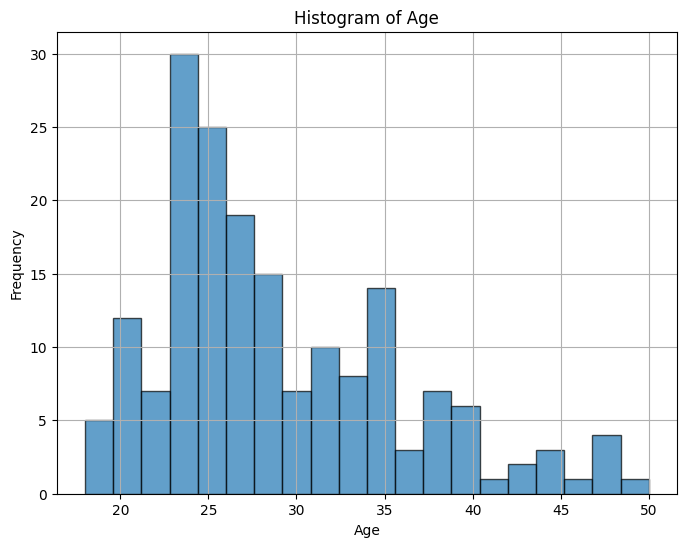

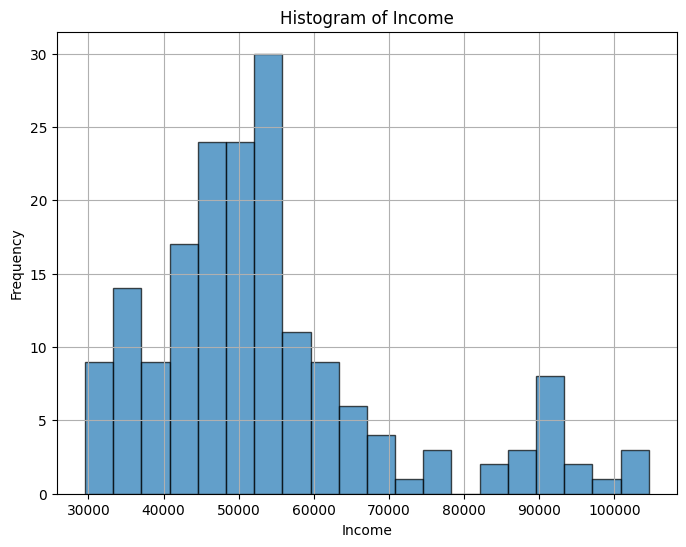

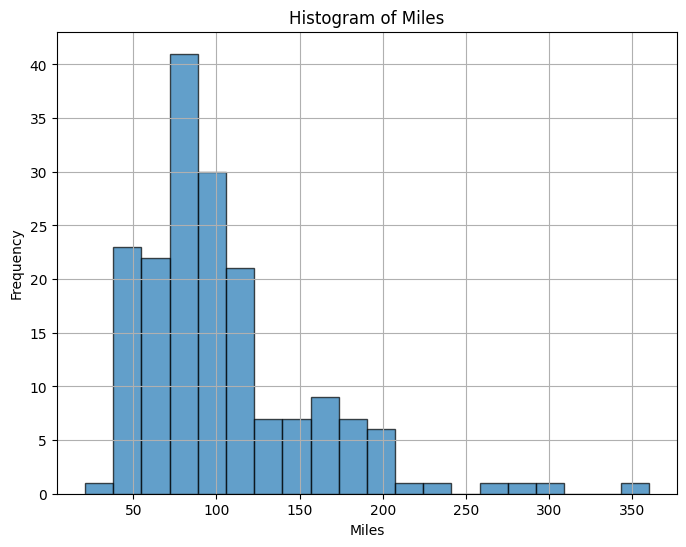

In [12]:
data=df

# Continuous variables
continuous_columns = ['Age', 'Income', 'Miles']

# Plotting histograms for continuous variables
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    data[column].plot(kind='hist', bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Observations from the Histograms

#### Age
- The age distribution shows a concentration in the younger age group, particularly between 18 and 25 years old.
- There are fewer individuals in the older age brackets, indicating a younger demographic for this dataset.

#### Income
- The income distribution is quite spread out, with a noticeable peak around the lower income range.
- There are fewer individuals with very high incomes, suggesting that the majority of the population has a mid to lower-range income.

#### Miles
- The miles distribution shows a right-skewed pattern, with most individuals running fewer miles.
- There are some individuals who run significantly more miles, but they are fewer in number.
  
### General Observations
- The histograms indicate that the dataset is not uniformly distributed across these continuous variables.
- The age and miles variables have a clear skewness, while income is more spread out with a concentration in the lower range.
  
These insights can guide further analysis, such as exploring correlations between variables or understanding the characteristics of different user segments based on age, income, and miles run.

# Box plot and outliers detection

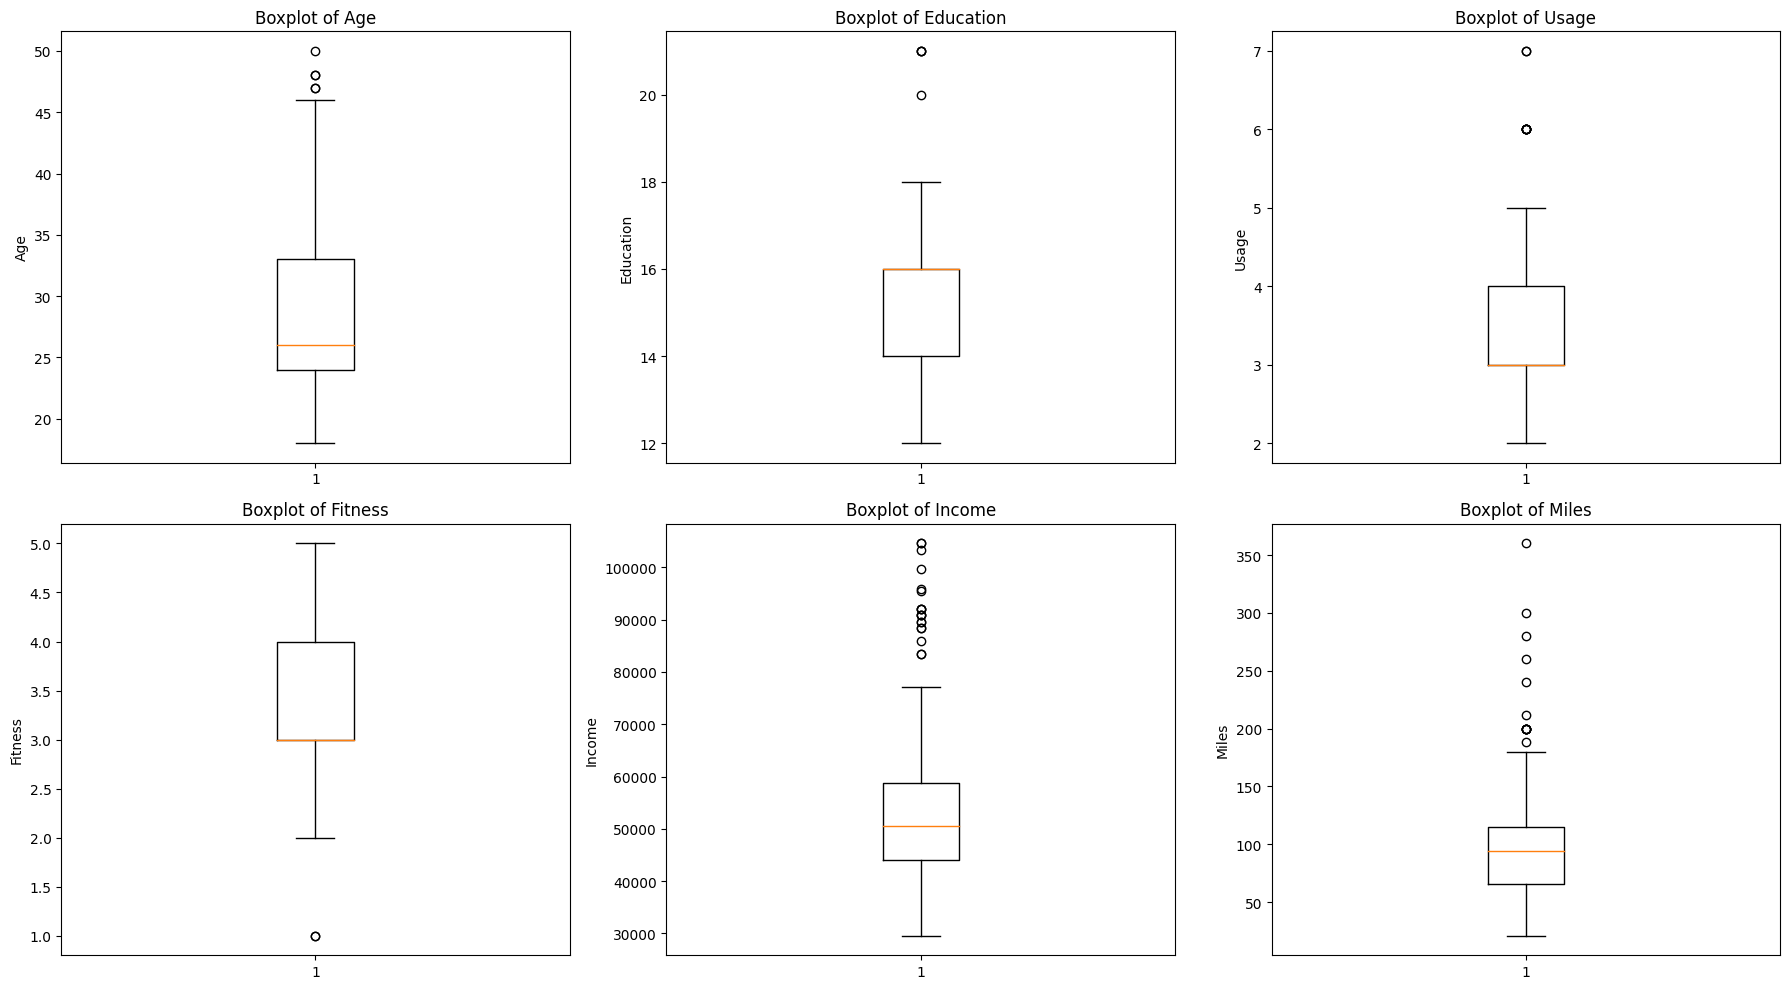

Mean-Median Differences:
Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64


In [13]:


# Summary statistics
summary_stats = df.describe()

# Identifying columns to check for outliers
columns_to_check = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Calculate the difference between mean and median
mean_median_diff = summary_stats.loc['mean', columns_to_check] - summary_stats.loc['50%', columns_to_check]

# Plotting box plots for each column to visualize outliers
plt.figure(figsize=(18, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

print("Mean-Median Differences:")
print(mean_median_diff)


Outliers detection


The box plots for each column are provided to visualize the outliers:

1.Age: A mean-median difference of 2.79 indicates a slight right-skew, which is evident from the box plot showing potential outliers above the upper quartile.

2.Education: A mean-median difference of -0.43 suggests a slight left-skew, though not significant. The box plot shows a few outliers on the lower side.
Usage: The small difference of 0.46 indicates a fairly symmetric distribution, with box plots confirming few outliers.

3.Fitness: With a difference of 0.31, the distribution is close to symmetric, with box plots showing some outliers on both ends.

4.Income: A significant difference of $3,123.08 suggests a right-skewed distribution. The box plot shows several outliers on the higher end of the income scale.

5.Miles: A difference of 9.19 indicates a slight right-skew, with the box plot showing some high mileage outlier

Insighsts


Age and Income: These columns have noticeable skewness with significant outliers, particularly in higher ranges.

Usage and Fitness: These are relatively symmetrically distributed with fewer outliers, indicating consistent usage patterns across users.

Education and Miles: These columns have minor skewness but still exhibit some outliers, suggesting varied user backgrounds and activity levels.


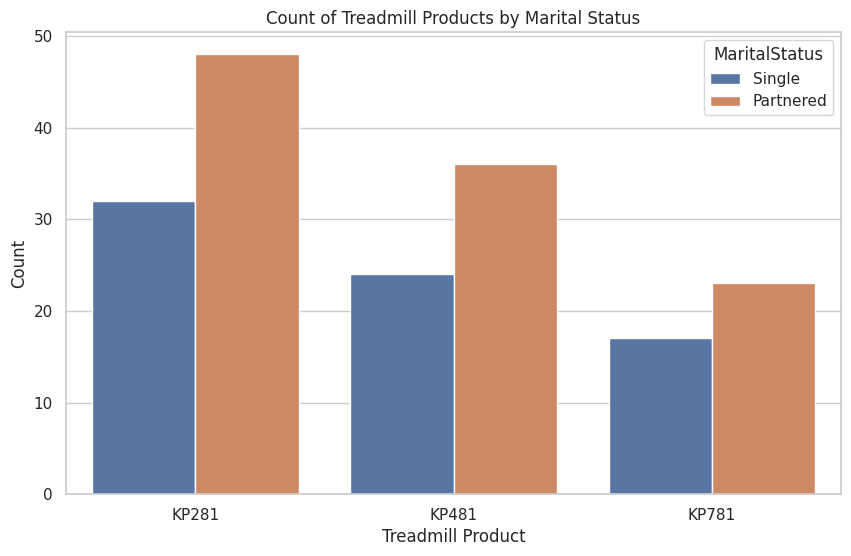

In [14]:
# Plot countplot for Marital Status vs Product
# Load the dataset
data = df

# Set the style for seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product', hue='MaritalStatus')
plt.title('Count of Treadmill Products by Marital Status')
plt.xlabel('Treadmill Product')
plt.ylabel('Count')
plt.show()

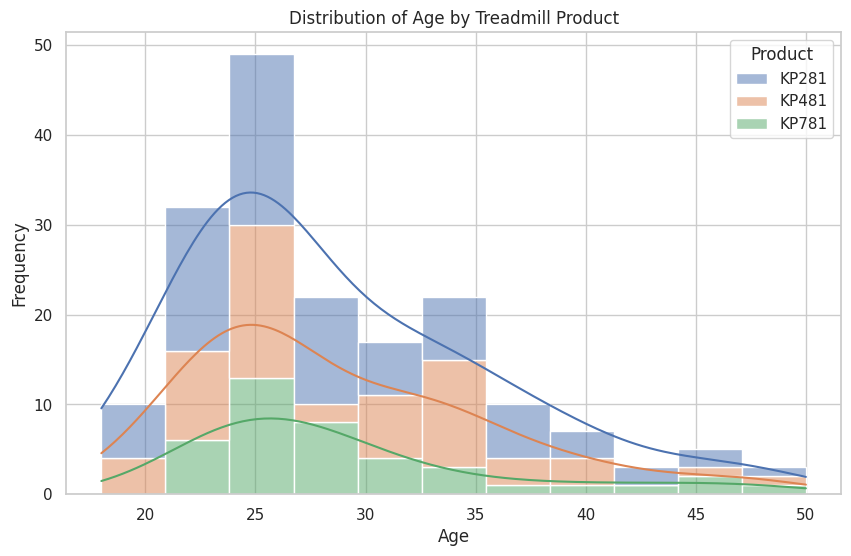

In [15]:

# Plot histograms for Age vs Product
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Product', multiple='stack', kde=True)
plt.title('Distribution of Age by Treadmill Product')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

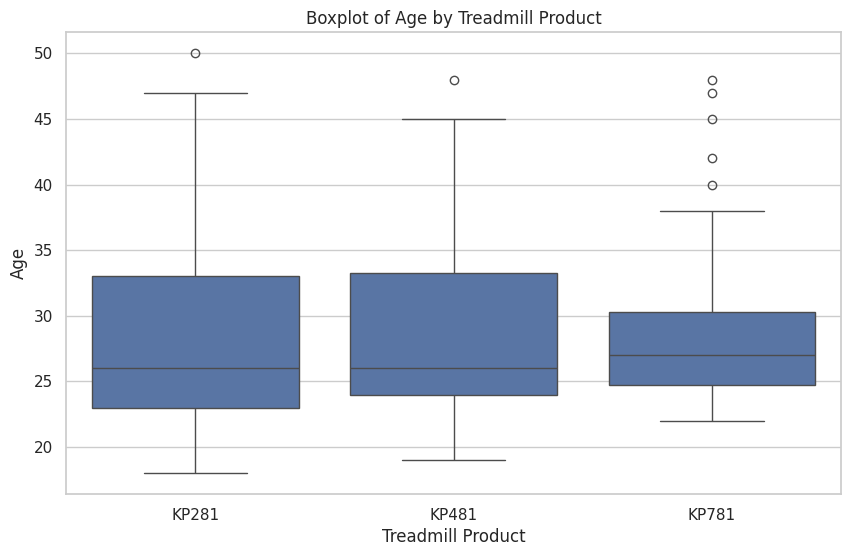

In [16]:

# Plot boxplot for Age vs Product
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Product', y='Age')
plt.title('Boxplot of Age by Treadmill Product')
plt.xlabel('Treadmill Product')
plt.ylabel('Age')
plt.show()


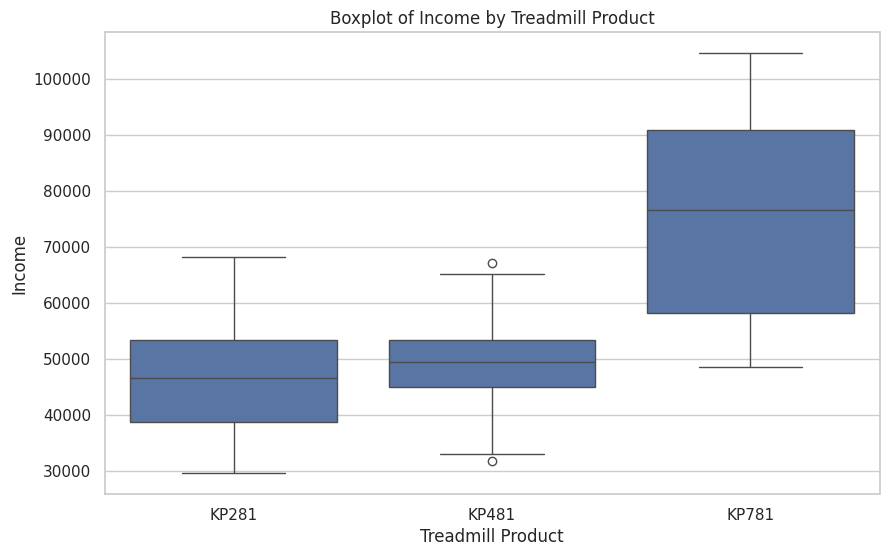

In [17]:

# Plot boxplot for Income vs Product
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Product', y='Income')
plt.title('Boxplot of Income by Treadmill Product')
plt.xlabel('Treadmill Product')
plt.ylabel('Income')
plt.show()

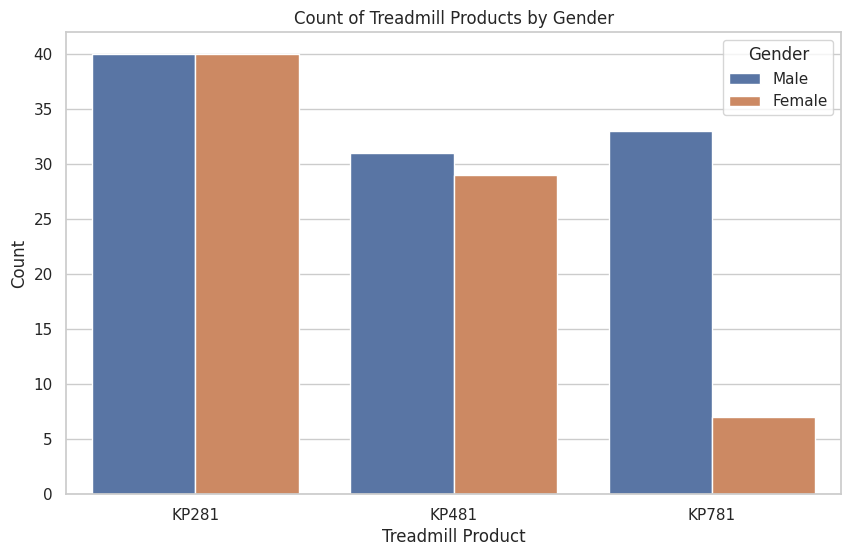

In [18]:
# Plot countplot for Gender vs Product
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product', hue='Gender')
plt.title('Count of Treadmill Products by Gender')
plt.xlabel('Treadmill Product')
plt.ylabel('Count')
plt.show()



### Observations

#### Marital Status and Product Purchased
- From the countplot of Product by Marital Status, we can observe if there is any preference for specific products among single or partnered individuals.
  - If the bars are unevenly distributed, it suggests a potential effect of marital status on the choice of product.

#### Gender and Product Purchased
- From the countplot of Product by Gender, we can see if there is a gender preference for specific products.
  - Uneven distribution of bars indicates a gender preference for certain products.

#### Age and Product Purchased
- The boxplot of Age by Product shows the age distribution for each product.
  - Variations in the median or interquartile range indicate an age preference for specific products.
  
- The histplot of Age by Product provides a detailed view of age distribution across different products.
  - Overlapping histograms show how age groups are distributed across different product types.

### General Insights
- These plots help identify if demographic factors like marital status, gender, and age influence the purchase decisions for different products.
- Identifying such patterns can be useful for targeted marketing and product development strategies.

# Pair plot

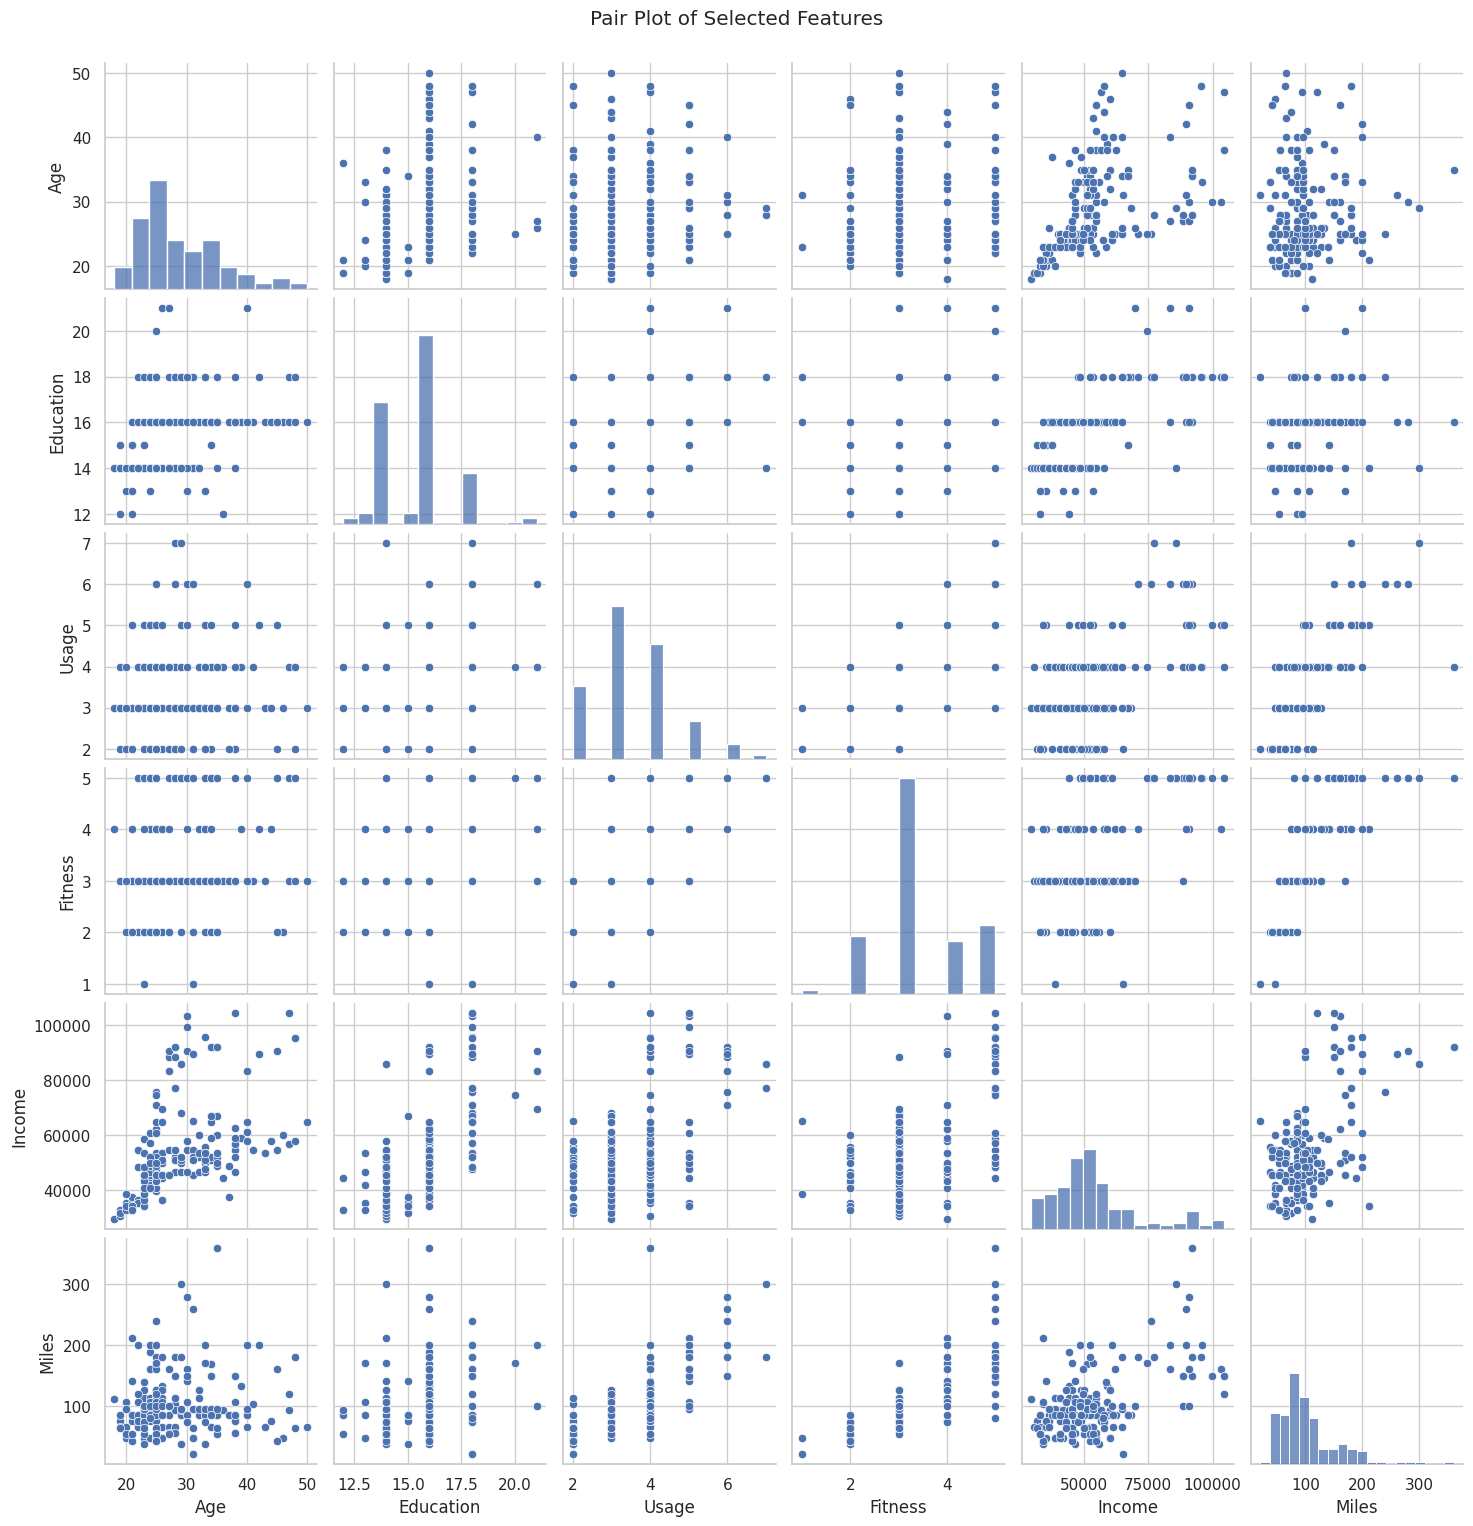

In [19]:

# Pair plot for selected features
selected_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.pairplot(data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()




A pair plot shows scatter plots for each pair of features, along with the distribution of each individual feature on the diagonal. Here are some points to observe:

#### Age
- **Age vs. Education**: Look for any trends or clusters indicating how education level varies with age.
- **Age vs. Usage**: Observe if there is any relationship between age and treadmill usage.
- **Age vs. Fitness**: See if fitness levels vary with age.
- **Age vs. Income**: Notice any patterns indicating how income changes with age.
- **Age vs. Miles**: Check if older or younger individuals tend to run more miles.

#### Education
- **Education vs. Usage**: Investigate if higher education correlates with treadmill usage.
- **Education vs. Fitness**: Examine the relationship between education and fitness levels.
- **Education vs. Income**: Typically, higher education correlates with higher income; see if this holds true.
- **Education vs. Miles**: Observe if education level affects the distance run.

#### Usage
- **Usage vs. Fitness**: Higher usage might correlate with better fitness levels.
- **Usage vs. Income**: Check if usage patterns differ across income levels.
- **Usage vs. Miles**: Usage should positively correlate with miles run.

#### Fitness
- **Fitness vs. Income**: Higher income might correlate with better fitness levels.
- **Fitness vs. Miles**: Better fitness levels should correlate with more miles run.

#### Income
- **Income vs. Miles**: Higher income individuals might run more miles due to better access to fitness resources.

### General Insights
- Look for clusters or outliers in the scatter plots to identify any unusual patterns.
- Correlation trends can help in understanding how one feature affects another.
- Distributions on the diagonal provide a sense of the central tendency and spread of each feature.

These insights can help tailor fitness programs, marketing strategies, and understand customer demographics better.

# What is the probability of a male customer buying a KP781 treadmill?

In [20]:

data = df

# Count the total number of male customers
total_males = data[data['Gender'] == 'Male'].shape[0]

# Count the number of male customers who purchased the KP781 treadmill
male_kp781 = data[(data['Gender'] == 'Male') & (data['Product'] == 'KP781')].shape[0]

# Calculate the probability
probability_male_kp781 = male_kp781 / total_males

# Display the result
print(f"The probability of a male customer buying a KP781 treadmill is: {probability_male_kp781:.4f}")


The probability of a male customer buying a KP781 treadmill is: 0.3173


# Customer Profiling

In [21]:


# 1. Product-based Segmentation
product_counts = df['Product'].value_counts()

# 2. Age-based Segmentation
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], labels=['Young Adults (18-25)', 'Adults (26-35)', 'Middle-aged (36-50)', 'Seniors (51+)'])
age_group_counts = df['Age_Group'].value_counts()

# 3. Gender-based Segmentation
gender_counts = df['Gender'].value_counts()

# 4. Education-based Segmentation
df['Education_Group'] = pd.cut(df['Education'], bins=[0, 13, 15, 100], labels=['High School', 'Some College', 'College Graduate'])
education_counts = df['Education_Group'].value_counts()

# 5. Marital Status Segmentation
marital_status_counts = df['MaritalStatus'].value_counts()

# 6. Usage-based Segmentation
df['Usage_Group'] = pd.cut(df['Usage'], bins=[0, 2, 4, 10], labels=['Light Users', 'Moderate Users', 'Heavy Users'])
usage_counts = df['Usage_Group'].value_counts()

# 7. Fitness Level Segmentation
df['Fitness_Group'] = pd.cut(df['Fitness'], bins=[0, 2, 4, 5], labels=['Beginners', 'Intermediate', 'Advanced'])
fitness_counts = df['Fitness_Group'].value_counts()

# 8. Income-based Segmentation
df['Income_Group'] = pd.cut(df['Income'], bins=[0, 40000, 70000, 1000000], labels=['Lower Income', 'Middle Income', 'Higher Income'])
income_counts = df['Income_Group'].value_counts()

# 9. Usage Intensity Segmentation
df['Miles_Group'] = pd.cut(df['Miles'], bins=[0, 50, 100, 1000], labels=['Light Users', 'Moderate Users', 'Heavy Users'])
miles_counts = df['Miles_Group'].value_counts()

# Function to plot segmentation results
def plot_segmentation(data, title):
    plt.figure(figsize=(8, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





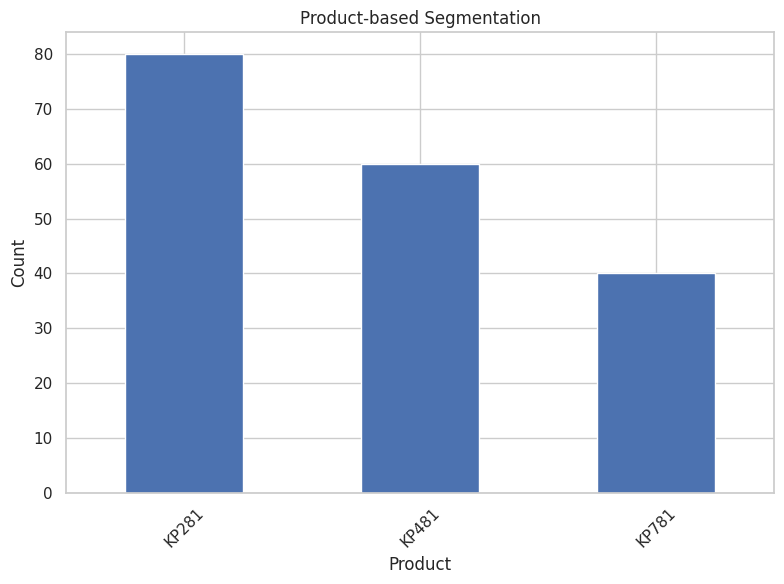

In [22]:
plot_segmentation(product_counts, 'Product-based Segmentation')


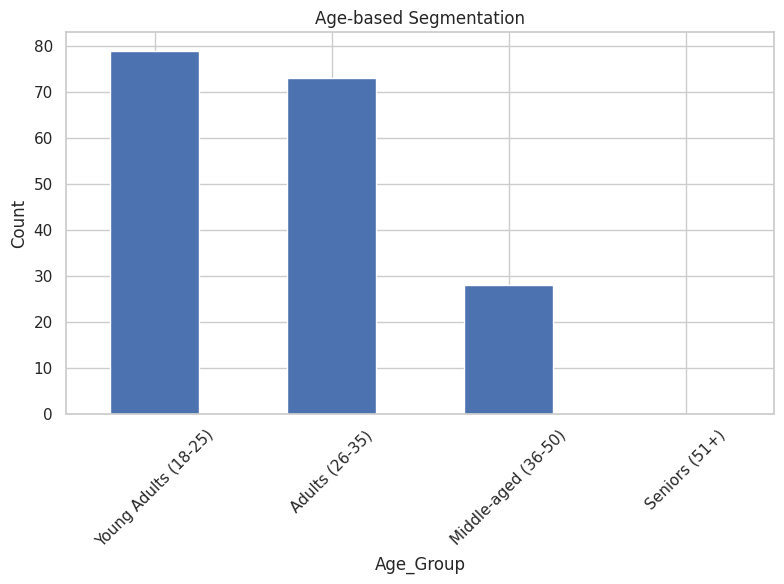

In [23]:
plot_segmentation(age_group_counts, 'Age-based Segmentation')

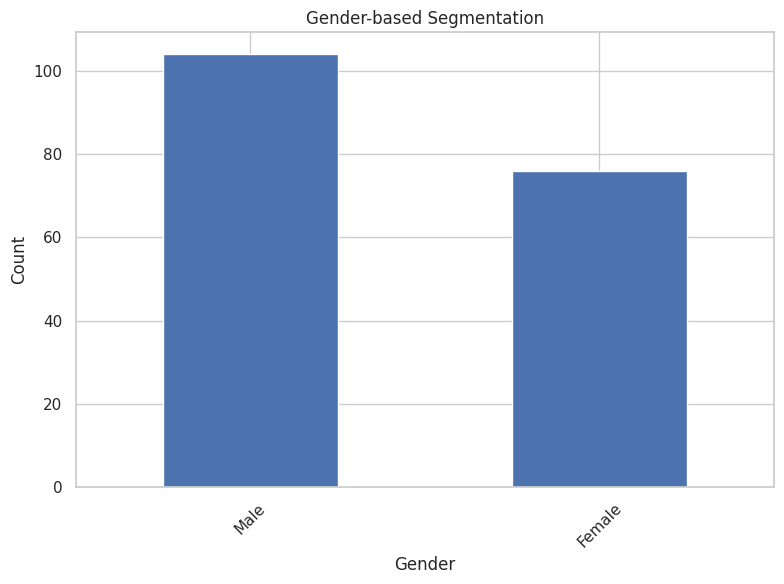

In [24]:
plot_segmentation(gender_counts, 'Gender-based Segmentation')

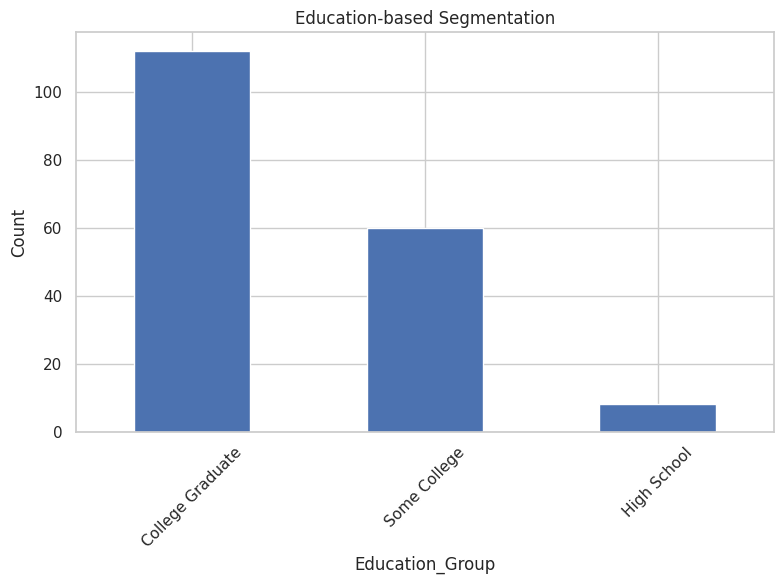

In [25]:
plot_segmentation(education_counts, 'Education-based Segmentation')

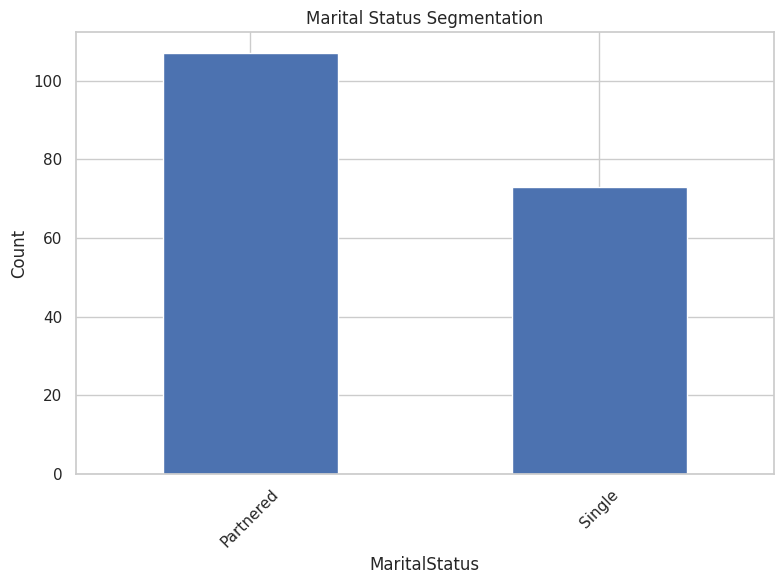

In [26]:
plot_segmentation(marital_status_counts, 'Marital Status Segmentation')

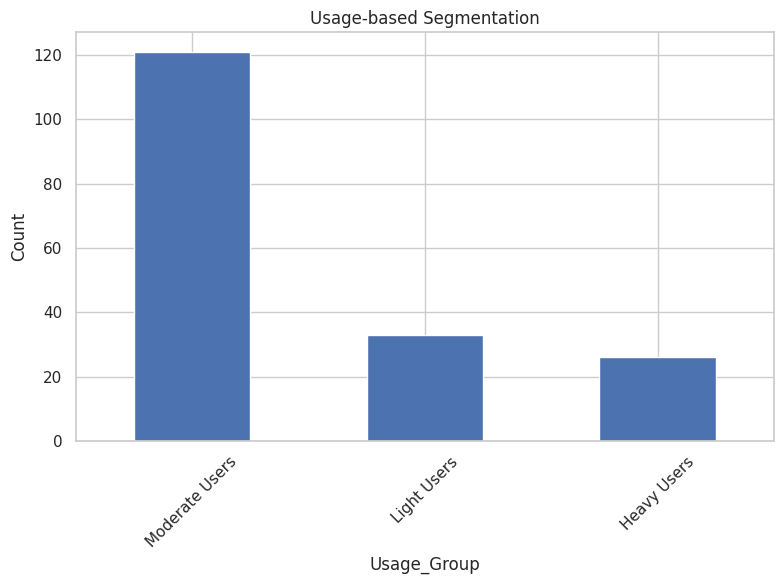

In [27]:
plot_segmentation(usage_counts, 'Usage-based Segmentation')

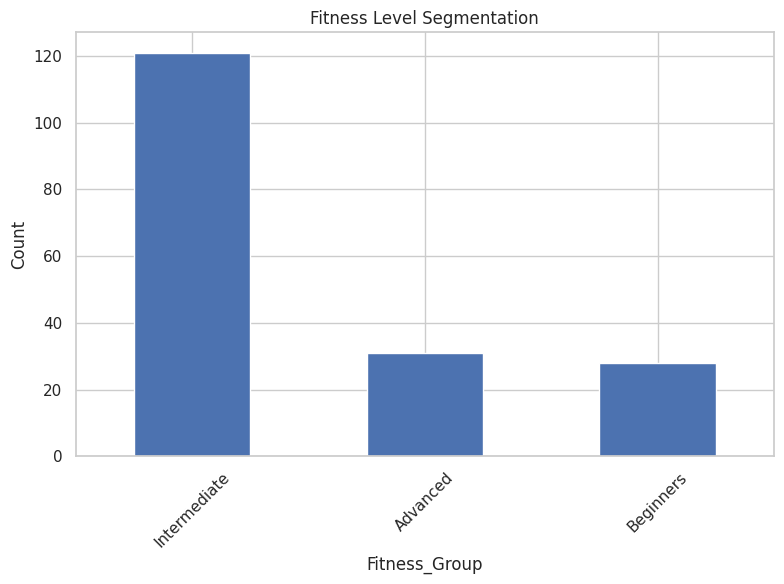

In [28]:

plot_segmentation(fitness_counts, 'Fitness Level Segmentation')

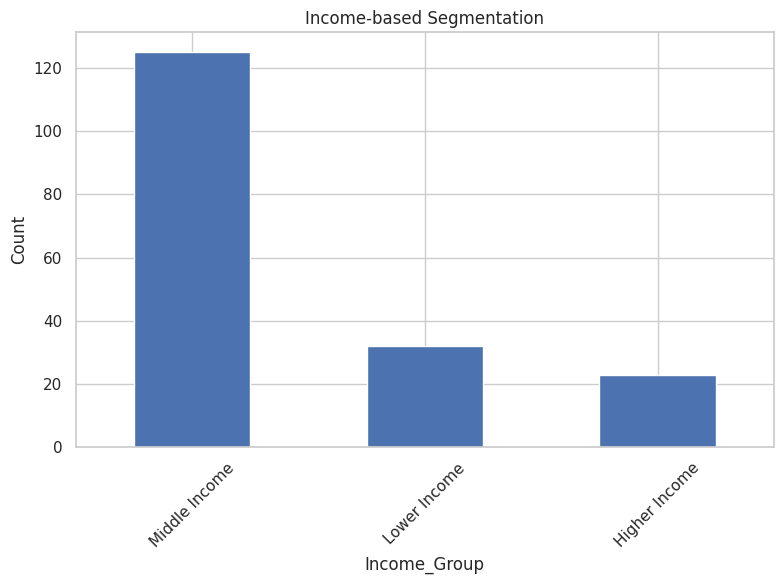

In [29]:
plot_segmentation(income_counts, 'Income-based Segmentation')

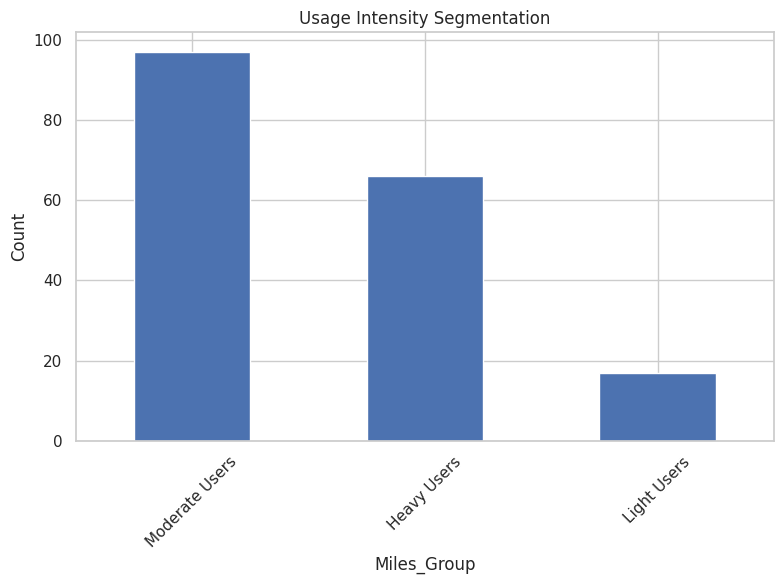

In [30]:

plot_segmentation(miles_counts, 'Usage Intensity Segmentation')



### Insights from the Segmentation

1. **Product-based Segmentation**
   - Observe which product has the highest and lowest number of users.
   - Determine if there's a dominant product among customers.

2. **Age-based Segmentation**
   - Identify which age group has the highest usage.
   - Understand if the products are more popular among young adults, adults, middle-aged, or seniors.

3. **Gender-based Segmentation**
   - Check the distribution of users based on gender.
   - Determine if there is a significant gender preference for the products.

4. **Education-based Segmentation**
   - Analyze the educational background of the users.
   - See if there is a higher concentration of users with high school, some college, or college graduate education.

5. **Marital Status Segmentation**
   - Understand the distribution of single and partnered users.
   - Determine if marital status influences product usage.

6. **Usage-based Segmentation**
   - Classify users into light, moderate, and heavy users based on their usage.
   - Identify the segment with the highest frequency.

7. **Fitness Level Segmentation**
   - Categorize users into beginners, intermediate, and advanced fitness levels.
   - Understand the fitness level of the majority of users.

8. **Income-based Segmentation**
   - Segment users into lower, middle, and higher income groups.
   - Identify which income group forms the largest customer base.

9. **Usage Intensity Segmentation**
   - Classify users based on the miles they run into light, moderate, and heavy users.
   - Determine the intensity of usage among the users.

These insights can help in understanding the customer demographics, preferences, and behavior, enabling targeted marketing and product development strategies.

# Representing the marginal probability

In [31]:
# Cross-tabulation for product vs other factors
print(pd.crosstab(df['Product'], df['Age_Group']))
print(pd.crosstab(df['Product'], df['Gender']))
print(pd.crosstab(df['Product'], df['Education_Group']))
print(pd.crosstab(df['Product'], df['MaritalStatus']))
print(pd.crosstab(df['Product'], df['Usage_Group']))
print(pd.crosstab(df['Product'], df['Fitness_Group']))
print(pd.crosstab(df['Product'], df['Income_Group']))
print(pd.crosstab(df['Product'], df['Miles_Group']))

Age_Group  Young Adults (18-25)  Adults (26-35)  Middle-aged (36-50)
Product                                                             
KP281                        34              32                   14
KP481                        28              24                    8
KP781                        17              17                    6
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33
Education_Group  High School  Some College  College Graduate
Product                                                     
KP281                      5            34                41
KP481                      3            24                33
KP781                      0             2                38
MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17
Usage_Group  Light Users  Moderate Users  Heavy Users
Product              

# Probability- marginal, conditional probability.

In [32]:


# Total number of customers
total_customers = len(df)

# 1. Marginal Probabilities

# Probability of each product
prob_product = df['Product'].value_counts(normalize=True)

# Probability of each gender
prob_gender = df['Gender'].value_counts(normalize=True)

# Probability of marital status
prob_marital = df['MaritalStatus'].value_counts(normalize=True)

print("Marginal Probabilities:")
print("Product:", prob_product)
print("Gender:", prob_gender)
print("Marital Status:", prob_marital)

# 2. Conditional Probabilities

# Probability of each product given gender
prob_product_given_gender = df.groupby('Gender')['Product'].value_counts(normalize=True).unstack()

# Probability of each product given marital status
prob_product_given_marital = df.groupby('MaritalStatus')['Product'].value_counts(normalize=True).unstack()

# Probability of gender given each product
prob_gender_given_product = df.groupby('Product')['Gender'].value_counts(normalize=True).unstack()

print("\nConditional Probabilities:")
print("Product given Gender:\n", prob_product_given_gender)
print("\nProduct given Marital Status:\n", prob_product_given_marital)
print("\nGender given Product:\n", prob_gender_given_product)

# 3. Additional Probability Calculations

# Probability of purchasing KP781 given income > 50000
high_income = df[df['Income'] > 50000]
prob_kp781_high_income = len(high_income[high_income['Product'] == 'KP781']) / len(high_income)

# Probability of being male given fitness level > 3
high_fitness = df[df['Fitness'] > 3]
prob_male_high_fitness = len(high_fitness[high_fitness['Gender'] == 'Male']) / len(high_fitness)

print("\nAdditional Probabilities:")
print(f"Probability of purchasing KP781 given income > 50000: {prob_kp781_high_income:.2f}")
print(f"Probability of being male given fitness level > 3: {prob_male_high_fitness:.2f}")

# 4. Joint Probabilities

# Joint probability of Product and Gender
joint_prob_product_gender = pd.crosstab(df['Product'], df['Gender'], normalize=True)

# Joint probability of Product and Marital Status
joint_prob_product_marital = pd.crosstab(df['Product'], df['MaritalStatus'], normalize=True)

print("\nJoint Probabilities:")
print("Product and Gender:\n", joint_prob_product_gender)
print("\nProduct and Marital Status:\n", joint_prob_product_marital)

Marginal Probabilities:
Product: Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64
Gender: Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64
Marital Status: MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

Conditional Probabilities:
Product given Gender:
 Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308

Product given Marital Status:
 Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877

Gender given Product:
 Gender     Female      Male
Product                    
KP281    0.500000  0.500000
KP481    0.483333  0.516667
KP781    0.175000  0.825000

Additional Probabilities:
Probability of purchasing KP781 given income > 50000: 0.36
Probability of bei

# Heat Maps

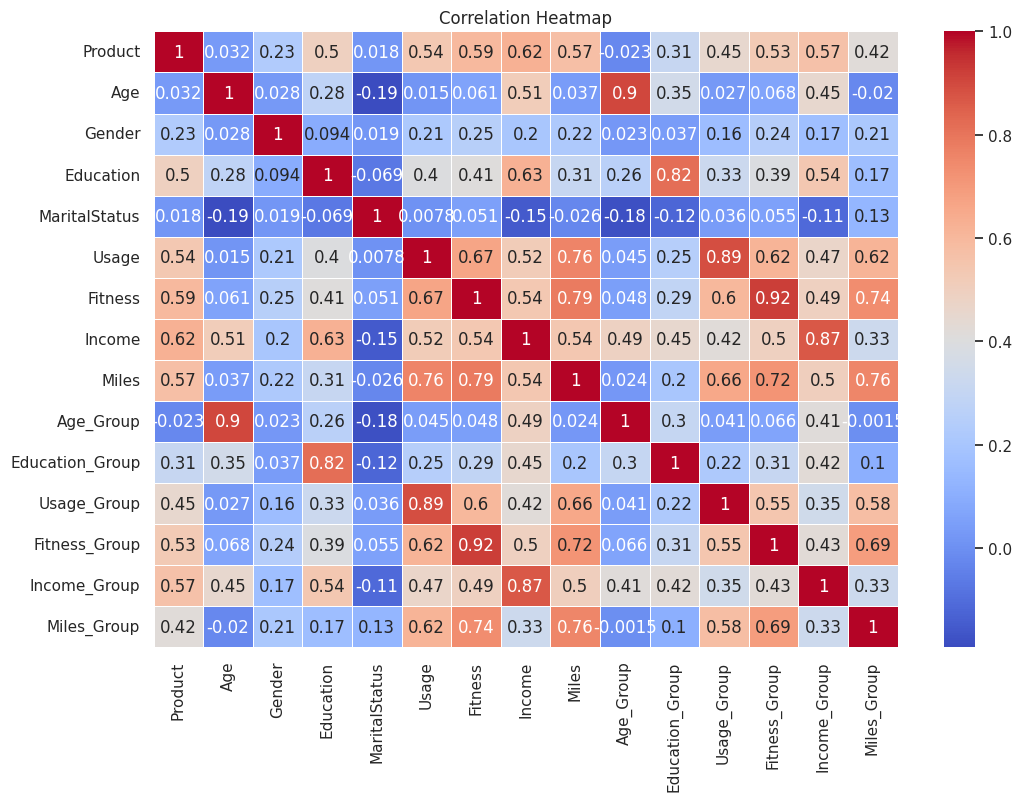

In [33]:
 #Convert categorical columns to numeric
df_numeric = df.copy()
df_numeric['Product'] = df['Product'].astype('category').cat.codes
df_numeric['Gender'] = df['Gender'].astype('category').cat.codes
df_numeric['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes
df_numeric['Age_Group'] = df['Age_Group'].astype('category').cat.codes
df_numeric['Education_Group'] = df['Education_Group'].astype('category').cat.codes
df_numeric['Usage_Group'] = df['Usage_Group'].astype('category').cat.codes
df_numeric['Fitness_Group'] = df['Fitness_Group'].astype('category').cat.codes
df_numeric['Income_Group'] = df['Income_Group'].astype('category').cat.codes
df_numeric['Miles_Group'] = df['Miles_Group'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



### How to Interpret the Correlation Heatmap

- **Correlation Values**:
  - Values close to +1 indicate a strong positive correlation.
  - Values close to -1 indicate a strong negative correlation.
  - Values around 0 indicate no correlation.

- **Key Relationships**:
  - Identify pairs of features with high positive or negative correlation.
  - Determine if any features are highly correlated with the target variable (if available).

### General Insights

- **Age**: See if age is correlated with other features like income, usage, and fitness levels.
- **Income**: Check the correlation of income with education, usage, and fitness.
- **Usage**: Understand how usage is correlated with fitness levels and miles run.
- **Fitness**: Determine if fitness levels correlate with age, income, and usage.

Identifying these correlations can help in understanding the relationships between different features and guide more detailed analyses or predictive modeling efforts.

# Aerofit Treadmill Recommendations and Actionable Insights

Based on the customer profiling and probability analysis of the Aerofit treadmill data, here are some recommendations and actionable insights:

## 1. Product-Specific Strategies

### KP281 (Entry-level model):
- Target younger adults (18-25) and those with lower incomes.
- Focus marketing on affordability and value for money.
- Highlight features that appeal to beginners and light users.

### KP481 (Mid-range model):
- Position as the "best value" option for moderate users and those with intermediate fitness levels.
- Create bundle offers with fitness accessories to attract customers looking to upgrade their home gym.

### KP781 (High-end model):
- Target high-income individuals and those with advanced fitness levels.
- Emphasize premium features, durability, and performance in marketing campaigns.
- Develop partnerships with fitness influencers or athletes to showcase the product's capabilities.

## 2. Gender-Based Marketing

- Tailor marketing messages and visuals to appeal to both genders, with a slight emphasis on male customers.
- Develop gender-specific marketing campaigns that address the unique fitness goals and preferences of each gender.
- Consider creating limited edition or special color variants to appeal to specific gender preferences.

## 3. Age-Specific Strategies

- For younger adults (18-25): Focus on social media marketing, emphasizing the treadmill's tech features and integration with fitness apps.
- For adults (26-35): Highlight time-saving benefits and the ability to maintain fitness while balancing work and personal life.
- For middle-aged customers (36-50): Emphasize health benefits, joint-friendly features, and the ability to maintain an active lifestyle.

## 4. Education-Based Approach

- For college graduates: Emphasize scientific benefits of regular exercise and provide detailed product specifications.
- For those with some college education: Focus on practical benefits and user testimonials.
- For high school graduates: Keep marketing messages simple and relatable, focusing on ease of use and basic health benefits.

## 5. Marital Status Considerations

- For partnered individuals: Promote the benefits of having a treadmill at home for shared fitness goals and family health.
- For single individuals: Emphasize space-saving designs and the convenience of working out at home.

## 6. Usage and Fitness Level Targeting

- Develop a quiz or online tool to help customers identify their usage level and fitness goals, then recommend the most suitable model.
- Create workout programs specific to each treadmill model, catering to different fitness levels and usage intensities.

## 7. Income-Based Strategies

- For higher-income segments: Offer premium delivery and installation services, extended warranties, and personalized fitness consultations.
- For middle-income segments: Provide flexible financing options and emphasize the long-term cost savings of owning a quality treadmill.
- For lower-income segments: Highlight the affordability of the entry-level model and offer budget-friendly maintenance plans.

## 8. Cross-Selling and Upselling

- Implement a trade-in program to encourage customers to upgrade from lower to higher-end models.
- Bundle treadmills with complementary fitness products (e.g., heart rate monitors, fitness trackers) to increase average order value.

## 9. Customer Retention and Engagement

- Develop a mobile app that integrates with all Aerofit treadmill models, offering workout tracking, challenges, and community features.
- Implement a loyalty program that rewards customers for consistent usage and achieving fitness milestones.

## 10. Product Development

- Consider developing a new mid-range plus model to bridge the gap between KP481 and KP781, catering to customers looking to upgrade from the mid-range option.
- Continuously gather customer feedback to inform future product enhancements and new feature development.

By implementing these recommendations, Aerofit can better target its marketing efforts, improve customer satisfaction, and potentially increase market share across different customer segments.